In [52]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras

In [53]:
df = pd.read_csv("customer.csv")
df.head()

df = df.drop(["customerID"], axis="columns")

In [54]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' unique values:")
    print(unique_values)

Column 'gender' unique values:
['Female' 'Male']
Column 'SeniorCitizen' unique values:
[0 1]
Column 'Partner' unique values:
['Yes' 'No']
Column 'Dependents' unique values:
['No' 'Yes']
Column 'tenure' unique values:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column 'PhoneService' unique values:
['No' 'Yes']
Column 'MultipleLines' unique values:
['No phone service' 'No' 'Yes']
Column 'InternetService' unique values:
['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' unique values:
['No' 'Yes' 'No internet service']
Column 'OnlineBackup' unique values:
['Yes' 'No' 'No internet service']
Column 'DeviceProtection' unique values:
['No' 'Yes' 'No internet service']
Column 'TechSupport' unique values:
['No' 'Yes' 'No internet service']
Column 'StreamingTV' unique values:
['No' 'Yes' 'No internet service']
Column '

In [55]:
df = df.drop(["TotalCharges"], axis="columns")

In [56]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [57]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [58]:
df["gender"].replace({'Female':1, 'Male':0}, inplace=True)

In [59]:
df["InternetService"] = pd.factorize(df['InternetService'])[0] + 1
df["Contract"] = pd.factorize(df['Contract'])[0] + 1
df["PaymentMethod"] = pd.factorize(df['PaymentMethod'])[0] + 1

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,1,1,1,70.70,1


In [60]:
#train test split
x = df.drop("Churn", axis="columns")
y = df["Churn"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

xtr, xte, ytr, yte = train_test_split(X_resampled, y_resampled, test_size=.27, random_state=5)

xtr.shape

(7554, 18)

In [61]:


model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(18,), activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(xtr, ytr, epochs=50)

Epoch 1/50
237/237 [==============================] - 1s 3ms/step - loss: 0.6070 - accuracy: 0.7244
Epoch 2/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.7875
Epoch 3/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4459 - accuracy: 0.7988
Epoch 4/50
237/237 [==============================] - 1s 4ms/step - loss: 0.4423 - accuracy: 0.7990
Epoch 5/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4406 - accuracy: 0.7959
Epoch 6/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7977
Epoch 7/50
237/237 [==============================] - 1s 4ms/step - loss: 0.4285 - accuracy: 0.8029
Epoch 8/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.8087
Epoch 9/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4317 - accuracy: 0.8024
Epoch 10/50
237/237 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8051

88/88 [==============================] - 0s 2ms/step - loss: 0.4217 - accuracy: 0.8085
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1388
           1       0.77      0.87      0.82      1406

    accuracy                           0.81      2794
   macro avg       0.81      0.81      0.81      2794
weighted avg       0.81      0.81      0.81      2794



<Axes: >

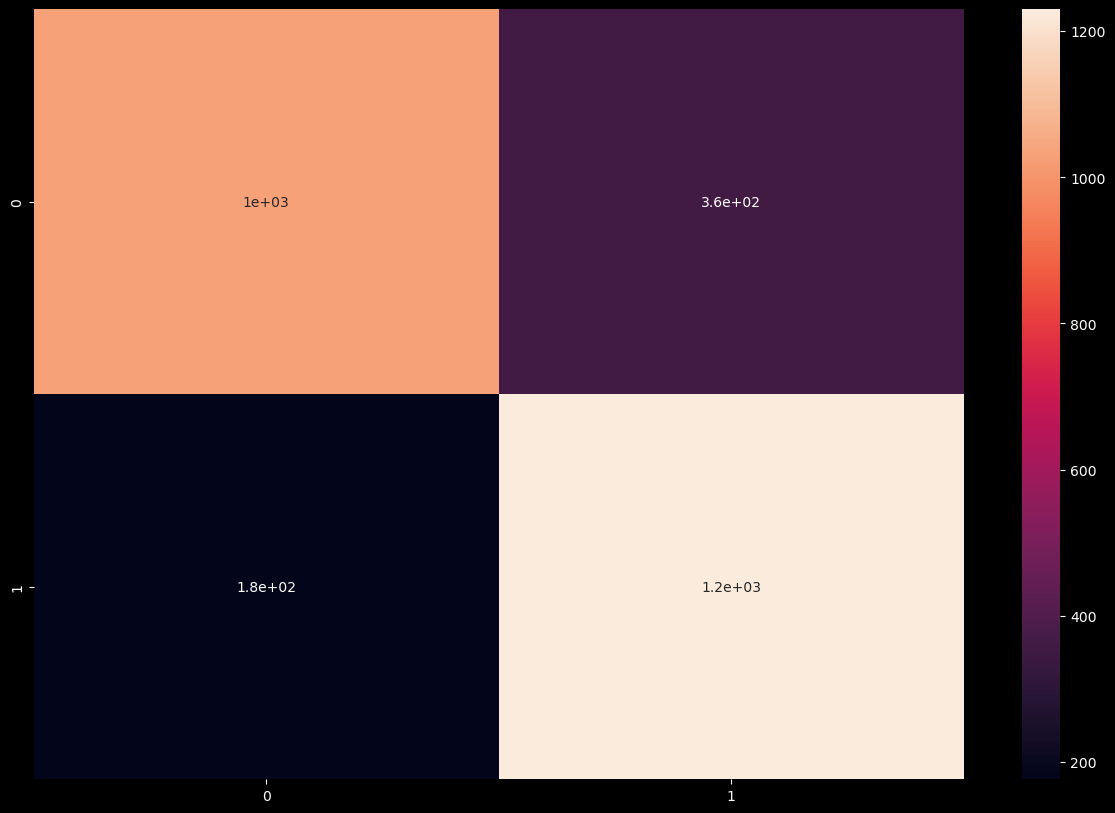

In [62]:
model.evaluate(xte, yte)

yp = model.predict(xte)

predict = []
for ele in yp:
    if ele > 0.5:
        predict.append(1)
    else:
        predict.append(0)

print(classification_report(yte, predict))

plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(yte, predict), annot=True)

In [63]:
model.save("annclass.h5")